In [7]:
# Load libraries
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from pylab import savefig
from plotnine import *
from matplotlib import pyplot as plt

In [8]:
#Read Lidar's data
static_test=pd.read_csv(r'lidar_data\test_stat.csv', usecols=range(4))
#Keep positive distance
static_test = static_test[static_test.Distance > 0]

Data collected with 2D solide state lidar has 16 segment

In [9]:
static_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131731 entries, 1 to 147927
Data columns (total 4 columns):
Time         131731 non-null int64
Segment      131731 non-null int64
Amplitude    131731 non-null float64
Distance     131731 non-null float64
dtypes: float64(2), int64(2)
memory usage: 5.0 MB


In [10]:
static_test.head()

,Time,Segment,Amplitude,Distance
1,120633,0,116.25,2.83
2,120633,1,17.75,0.16
3,120633,1,90.75,3.16
4,120633,2,246.48,3.31
5,120633,3,83.00,3.72


[Text(0, 0.5, "observation's Count"), Text(0.5, 0, 'Segment')]

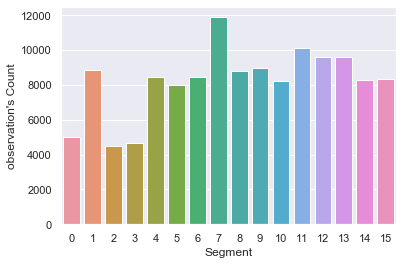

In [11]:
#Count number of observations for every segment
sns.set(style="darkgrid")
ax = sns.countplot(x="Segment", data=static_test)
ax.set(xlabel="Segment", ylabel = "observation's Count")

In [12]:
#data description
static_test.describe()

,Time,Segment,Amplitude,Distance
count,1.317310e+05,131731.000000,131731.000000,131731.000000
mean,8.389470e+05,8.085720,55.779483,4.239301
std,4.073756e+05,4.372092,98.014145,4.136107
min,1.206330e+05,0.000000,0.010000,0.010000
25%,4.834860e+05,5.000000,10.150000,0.100000
50%,8.377010e+05,8.000000,16.000000,3.410000
75%,1.196714e+06,12.000000,50.250000,7.170000
max,1.550604e+06,15.000000,794.800000,19.470000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AEC1F73C48>,
      dtype=object)

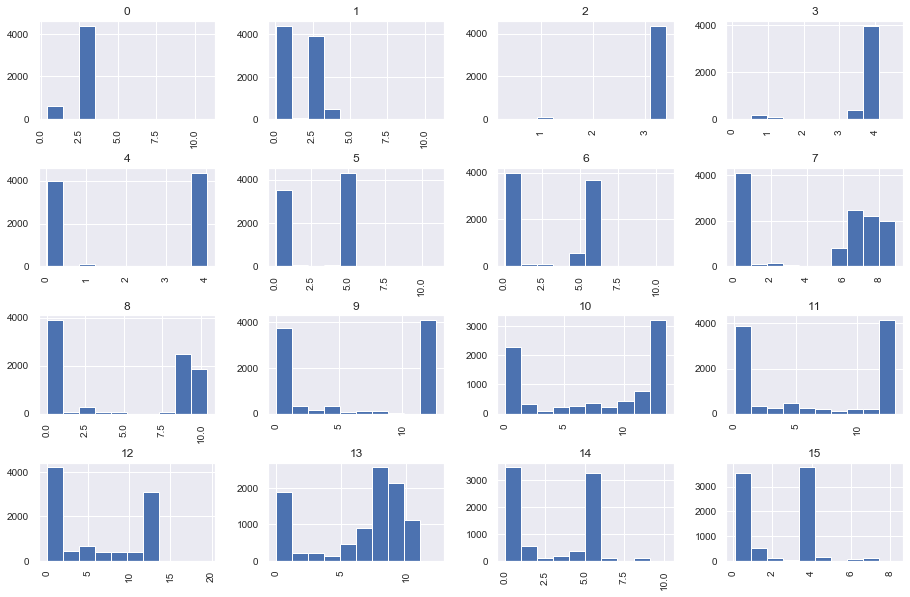

In [13]:
#Histogram of Distance
static_test.hist(by='Segment',column = 'Distance', figsize=(15, 10), xlabelsize=10, ylabelsize=10 )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AEC1F73508>,
      dtype=object)

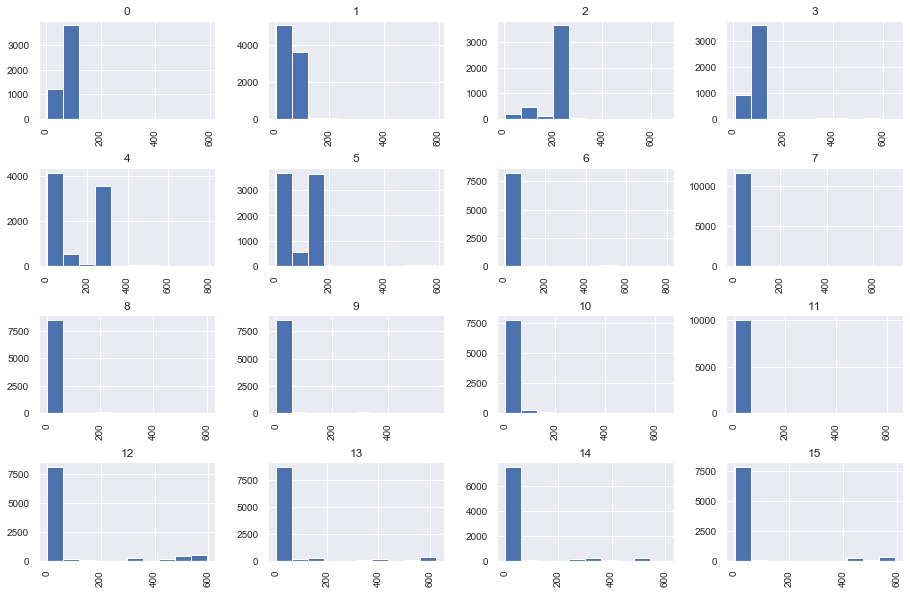

In [14]:
#Histogram of Amplitude
static_test.hist(by='Segment',column = 'Amplitude', figsize=(15, 10), xlabelsize=10, ylabelsize=10 )

this next section, we will aggregate data and make pivot table to analyse timeseries data

In [17]:
# Grouped data
grp_static=static_test.groupby(['Time','Segment'])

In [18]:
# Aggregate with maximum distance
grp_static=grp_static.apply(lambda x: x.loc[x.Distance.idxmax()])

In [19]:
#Drop second level
grp_static.index = grp_static.index.droplevel(-2)

In [27]:
# Change type of segment column  
grp_static.Segment=grp_static.Segment.astype('int')
grp_static.Segment=grp_static.Segment.astype('category')

In [28]:
grp_static.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71573 entries, 0 to 71572
Data columns (total 7 columns):
Time             71573 non-null float64
Segment          71573 non-null category
Amplitude        71573 non-null float64
Distance         71573 non-null float64
heure            71573 non-null object
Observation      71573 non-null int64
Observation_d    71573 non-null int64
dtypes: category(1), float64(3), int64(2), object(1)
memory usage: 3.9+ MB


In [29]:
#Read real Observations from manual annotations
observation=pd.read_csv(r'Groundtruth\obser_stat.csv')

In [36]:
#Merge two dataframe real observation file and lidar file
grp_static=grp_static.merge(observation, on='Time', how='inner')

In [37]:
# Convert to timeseries data
pivot_static=pd.pivot_table(grp_static, values=['Amplitude','Distance'], index='Time', columns='Segment')

In [42]:
pivot_static.head()

Amplitude                                                            \
Segment         0      1       2      3       4       5      6     7      8    
Time                                                                           
120633.0    116.25  90.75  246.48  83.00  269.28  164.00  53.75  3.75  26.34   
120953.0    116.25  90.50  240.70  82.75  269.43  166.63  53.88  7.50  28.57   
121273.0    116.13  90.63  245.49  82.88  269.25  167.88  52.50  3.75  27.06   
121592.0    116.38  90.88  248.57  83.13  269.25  167.88  54.00  3.75  27.07   
121912.0    116.25  90.75  247.86  83.13  269.32  165.25  53.25  3.75  26.02   

                 ... Distance                                                \
Segment      9   ...       6     7     8      9      10     11     12    13   
Time             ...                                                          
120633.0  14.41  ...     5.55  8.35  9.36  12.33  12.31  12.29  12.28  9.07   
120953.0  14.45  ...     5.25  8.05  9.36  12.34  12.31  12.29  12.28  9.37   
121273.0  14.40  ...     5.55  8.35  9.35  12.34  12.32  12.29  12.27  9.37   
121592.0  14.51  ...     5.55  8.35  9.36  12.34  12.32  12.29  12.27  9.07   
121912.0  14.35  ...     5.55  8.35  9.36  12.34  12.31  12.29  12.27  9.07   

                      
Segment     14    15  
Time                  
120633.0  5.49  4.04  
120953.0  5.49  4.04  
121273.0  5.49  4.04  
121592.0  5.49  4.04  
121912.0  5.49  4.04  

[5 rows x 32 columns]

In [43]:
#Merge two dataframe real observation file and lidar file
pivot_static=pivot_static.merge(observation, on='Time', how='inner')

C:\Users\Mohammed\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:617: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [45]:
pivot_static.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4474 entries, 0 to 4473
Data columns (total 36 columns):
Time               4474 non-null float64
(Amplitude, 0)     4472 non-null float64
(Amplitude, 1)     4473 non-null float64
(Amplitude, 2)     4473 non-null float64
(Amplitude, 3)     4473 non-null float64
(Amplitude, 4)     4474 non-null float64
(Amplitude, 5)     4474 non-null float64
(Amplitude, 6)     4473 non-null float64
(Amplitude, 7)     4474 non-null float64
(Amplitude, 8)     4474 non-null float64
(Amplitude, 9)     4474 non-null float64
(Amplitude, 10)    4474 non-null float64
(Amplitude, 11)    4474 non-null float64
(Amplitude, 12)    4474 non-null float64
(Amplitude, 13)    4471 non-null float64
(Amplitude, 14)    4472 non-null float64
(Amplitude, 15)    4474 non-null float64
(Distance, 0)      4472 non-null float64
(Distance, 1)      4473 non-null float64
(Distance, 2)      4473 non-null float64
(Distance, 3)      4473 non-null float64
(Distance, 4)      4474 non-null

In [46]:
pivot_static=pivot_static.set_axis(['Time', 'Ampl_0', 'Ampl_1', 'Ampl_2', 'Ampl_3', 'Ampl_4','Ampl_5', 'Ampl_6', 'Ampl_7', 'Ampl_8', 'Ampl_9', 'Ampl_10', 'Ampl_11', 'Ampl_12', 'Ampl_13', 'Ampl_14', 'Ampl_15', 'Dist_0', 'Dist_1', 'Dist_2', 'Dist_3', 'Dist_4', 'Dist_5', 'Dist_6', 'Dist_7', 'Dist_8', 'Dist_9', 'Dist_10', 'Dist_11', 'Dist_12', 'Dist_13', 'Dist_14', 'Dist_15', 'Heure','Observation','Observation_d'], axis=1, inplace=False)

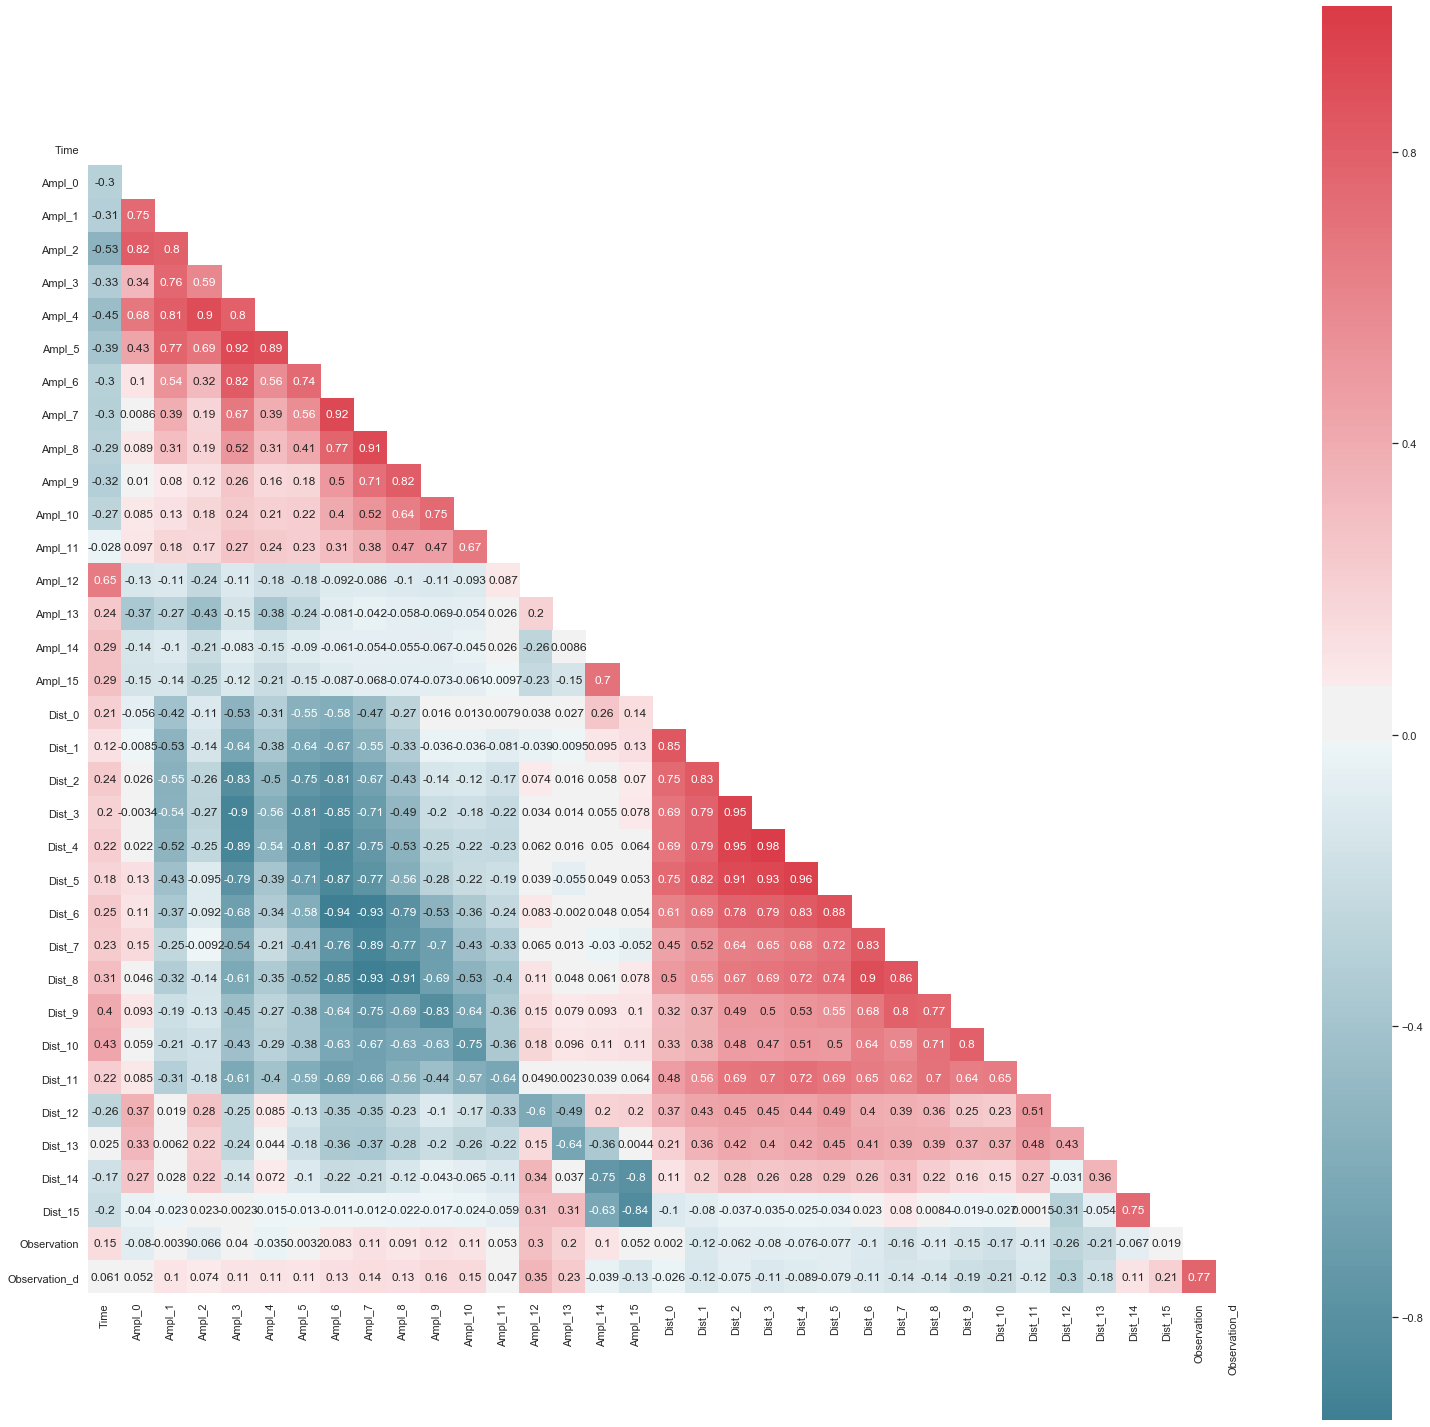

In [47]:
# Compute the correlation matrix between columns
corr = pivot_static.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(26, 26))
    ax = sns.heatmap(corr, mask=mask, cmap=cmap, square=True, annot=True)

This next section graphical analysis for every scenario: 

-Scenario 1: stationary pedestrian at different distances 

-Scenario 2: moving pedestrian moving away and approaching the lidar 

-Scenario 3: pedestrian crosses in front of the lidar

-Scenario 4: presence of a cone

In [31]:
# Scenario 1
sc1= grp_static.loc[(grp_static["Time"]>=150684) & (grp_static["Time"]<=490519)]

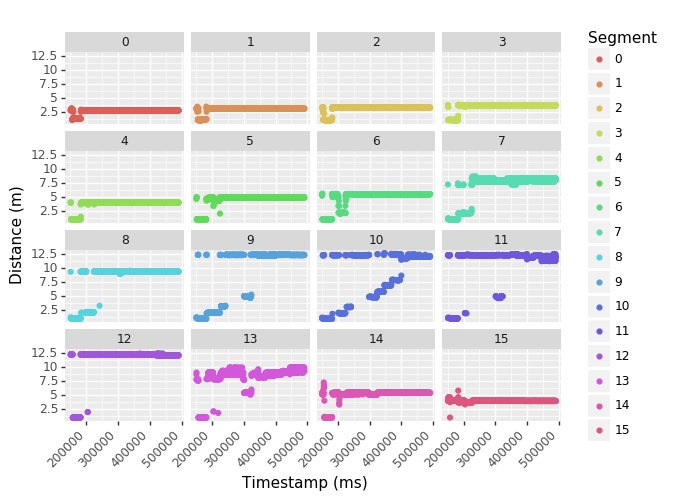

<ggplot: (-9223371852502414560)>

In [32]:
#Distance in time for Scenario 1
ggplot(sc1, aes(x='Time', y='Distance', color='Segment')) + \
    geom_point() + \
    facet_wrap("Segment") +\
    xlab("Timestamp (ms)") + ylab("Distance (m)") + theme(axis_text_x  = element_text(angle = 45, hjust = 1))

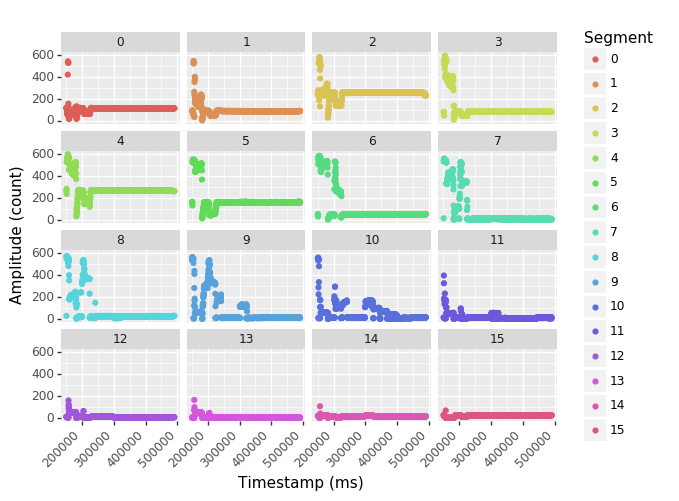

<ggplot: (-9223371852496042204)>

In [33]:
#Amplitude in time for Scenario 1
ggplot(sc1, aes(x='Time', y='Amplitude', color='Segment')) + \
    geom_point() + \
    facet_wrap("Segment") +\
    xlab("Timestamp (ms)") + ylab("Amplitude (count)") + theme(axis_text_x  = element_text(angle = 45, hjust = 1))

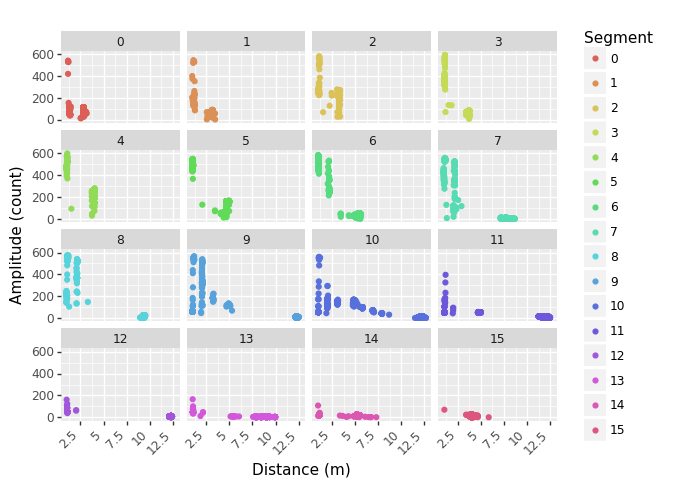

<ggplot: (-9223371852499659064)>

In [34]:
#Distance VS Amplitude for Scenario 1
ggplot(sc1, aes(x='Distance', y='Amplitude', color='Segment')) + \
    geom_point() + \
    facet_wrap("Segment") +\
    xlab("Distance (m)") + ylab("Amplitude (count)") + theme(axis_text_x  = element_text(angle = 45, hjust = 1))

In [52]:
# Scenario 2
sc2=grp_static.loc[(grp_static["Time"]>=701515) & (grp_static["Time"]<=762575)]

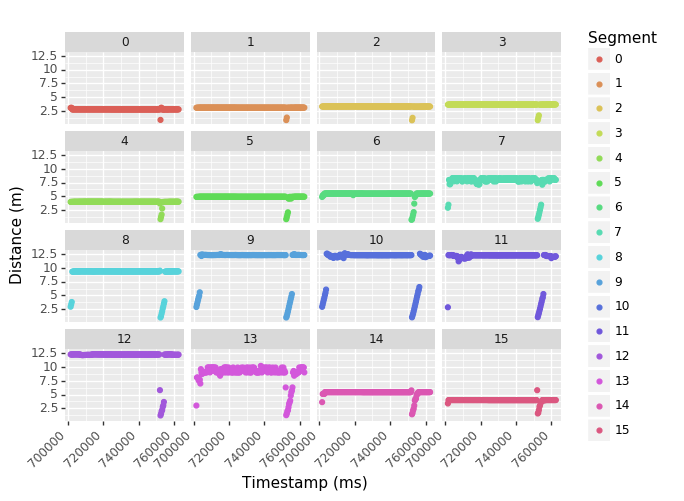

<ggplot: (-9223371852495208856)>

In [53]:
#Distance in time for Scenario 2
ggplot(sc2, aes(x='Time', y='Distance', color='Segment')) + \
    geom_point() + \
    facet_wrap("Segment") +\
    xlab("Timestamp (ms)") + ylab("Distance (m)") + theme(axis_text_x  = element_text(angle = 45, hjust = 1))

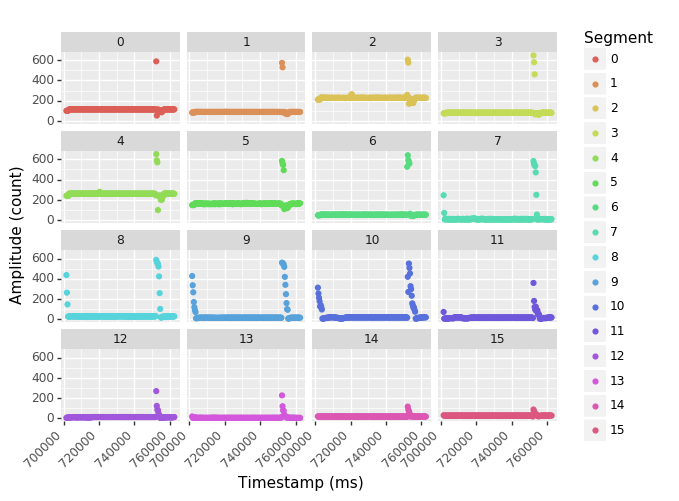

<ggplot: (-9223371852502512752)>

In [54]:
#Amplitude in time for Scenario 2
ggplot(sc2, aes(x='Time', y='Amplitude', color='Segment')) + \
    geom_point() + \
    facet_wrap("Segment") +\
    xlab("Timestamp (ms)") + ylab("Amplitude (count)") + theme(axis_text_x  = element_text(angle = 45, hjust = 1))

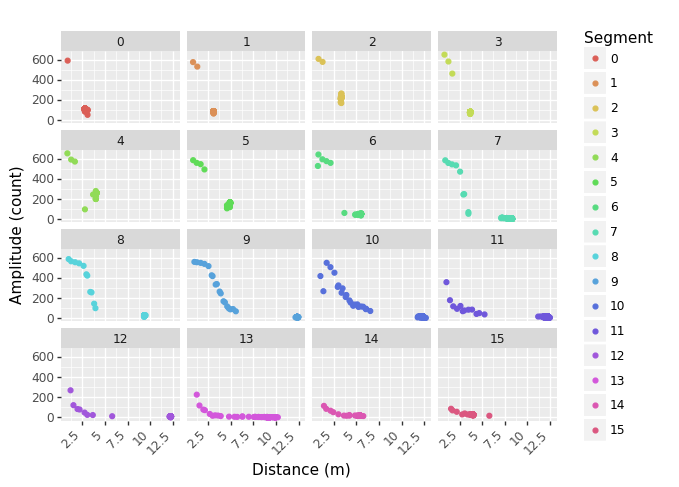

<ggplot: (-9223371852501665048)>

In [55]:
#Distance VS Amplitude for Scenario 2
ggplot(sc2, aes(x='Distance', y='Amplitude', color='Segment')) + \
    geom_point() + \
    facet_wrap("Segment") +\
    xlab("Distance (m)") + ylab("Amplitude (count)") + theme(axis_text_x  = element_text(angle = 45, hjust = 1))

In [56]:
#Scenario 3
sc3= grp_static.loc[(grp_static["Time"]>=539750) & (grp_static["Time"]<=682970)]

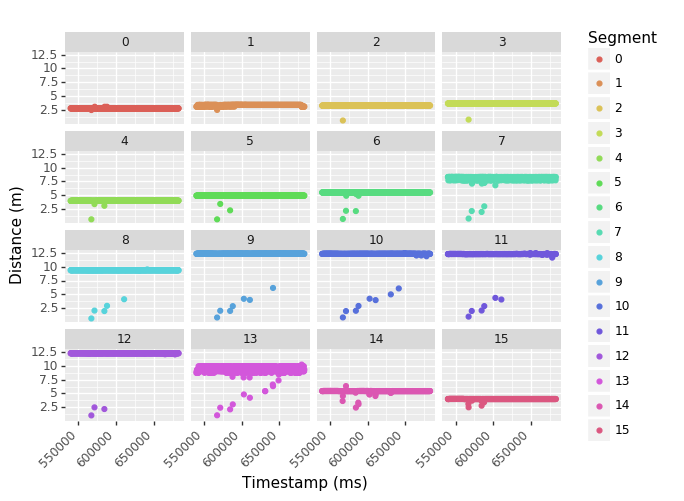

<ggplot: (-9223371852502546076)>

In [57]:
#Distance in time for Scenario 3
ggplot(sc3, aes(x='Time', y='Distance', color='Segment')) + \
    geom_point() + \
    facet_wrap("Segment") +\
    xlab("Timestamp (ms)") + ylab("Distance (m)") + theme(axis_text_x  = element_text(angle = 45, hjust = 1))

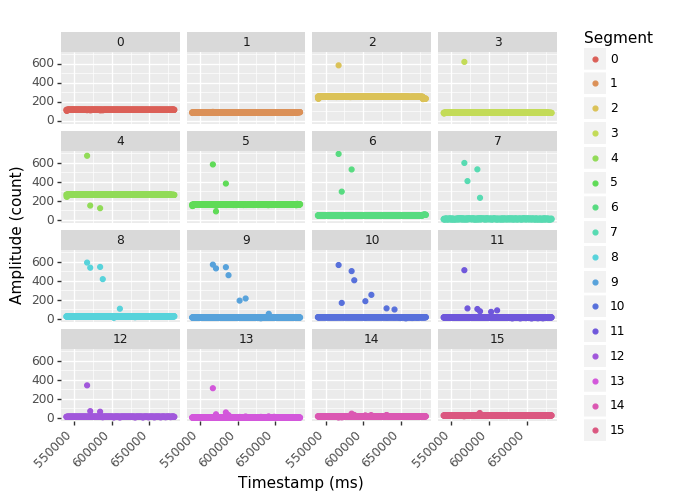

<ggplot: (-9223371852499201268)>

In [58]:
#Amplitude in time for Scenario 3
ggplot(sc3, aes(x='Time', y='Amplitude', color='Segment')) + \
    geom_point() + \
    facet_wrap("Segment") +\
    xlab("Timestamp (ms)") + ylab("Amplitude (count)") + theme(axis_text_x  = element_text(angle = 45, hjust = 1))

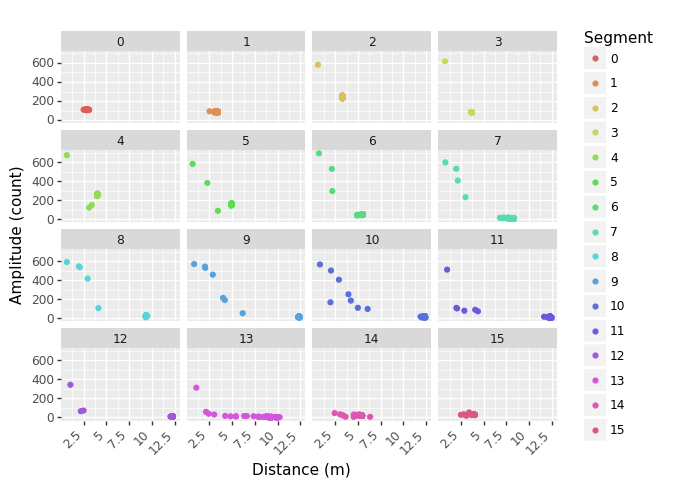

<ggplot: (-9223371852501262364)>

In [59]:
#Distance VS Amplitude for Scenario 3
ggplot(sc3, aes(x='Distance', y='Amplitude', color='Segment')) + \
    geom_point() + \
    facet_wrap("Segment") +\
    xlab("Distance (m)") + ylab("Amplitude (count)") + theme(axis_text_x  = element_text(angle = 45, hjust = 1))

In [60]:
# Scenario 4
sc4=grp_static.loc[(grp_static["Time"]>=872866) & (grp_static["Time"]<=1525349)]

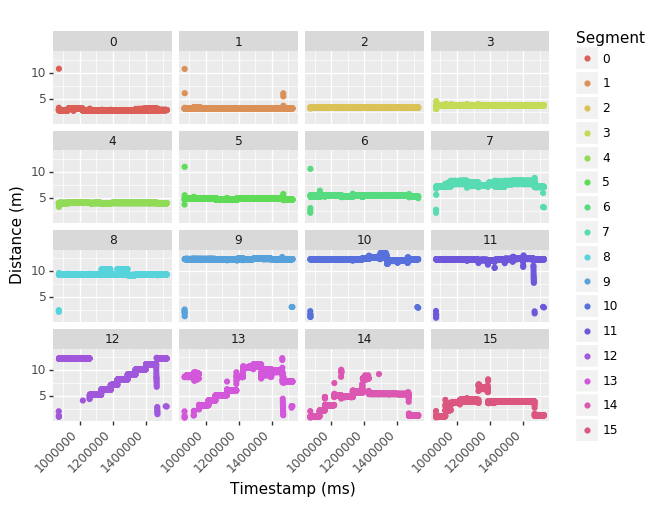

<ggplot: (-9223371852501242960)>

In [61]:
#Distance in time for Scenario 4
ggplot(sc4, aes(x='Time', y='Distance', color='Segment')) + \
    geom_point() + \
    facet_wrap("Segment") +\
    xlab("Timestamp (ms)") + ylab("Distance (m)") + theme(axis_text_x  = element_text(angle = 45, hjust = 1))

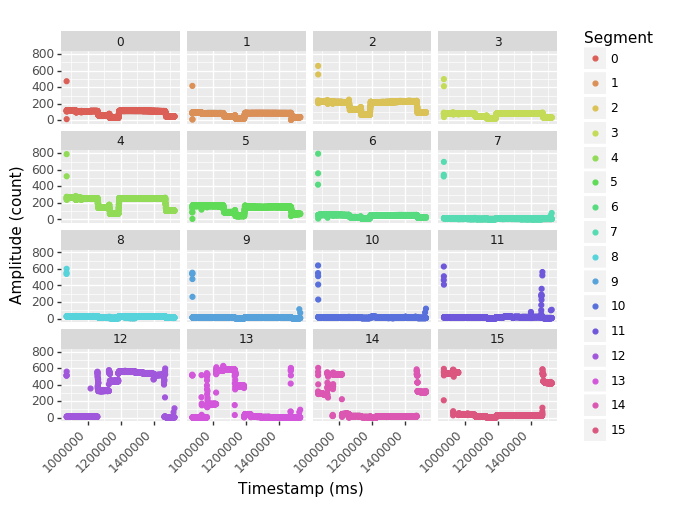

<ggplot: (-9223371852497472072)>

In [62]:
#Amplitude in time for Scenario 4
ggplot(sc4, aes(x='Time', y='Amplitude', color='Segment')) + \
    geom_point() + \
    facet_wrap("Segment") +\
    xlab("Timestamp (ms)") + ylab("Amplitude (count)") + theme(axis_text_x  = element_text(angle = 45, hjust = 1))

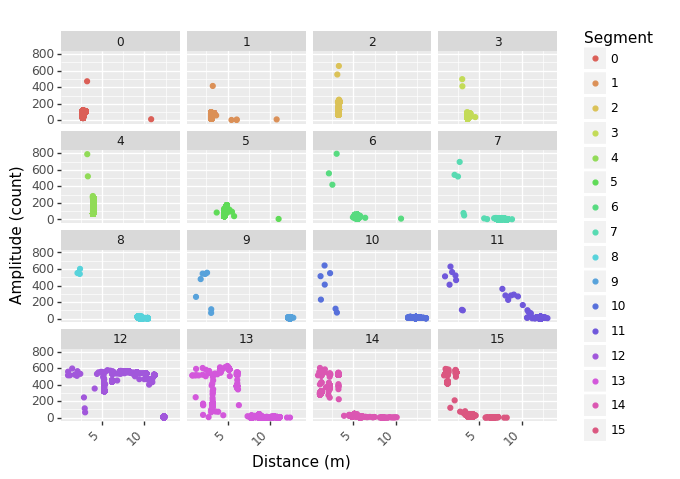

<ggplot: (-9223371852499716664)>

In [63]:
#Distance VS Amplitude for Scenario 4
ggplot(sc4, aes(x='Distance', y='Amplitude', color='Segment')) + \
    geom_point() + \
    facet_wrap("Segment") +\
    xlab("Distance (m)") + ylab("Amplitude (count)") + theme(axis_text_x  = element_text(angle = 45, hjust = 1))